# Problem 4> K-means, K-medoids

## 1. Load and Visualize the dataset (2p)

In [51]:
import numpy as np
from time import time

In [52]:
# You don't need to modify this cell

## Load data

X_1 = np.load('./data_4_1.npy') # data_1

data_2 = np.load('./data_4_2.npz') # data_2
X_2 = data_2['X']
y_2 = data_2['y']

# Sanity check
print('Data shape: ', X_1.shape) # (1500, 2)
print('Data shape: ', X_2.shape) # (1500, 6)
print('Data shape: ', y_2.shape) # (1500,)

Data shape:  (1500, 2)
Data shape:  (1500, 6)
Data shape:  (1500,)


>test 

In [53]:
print(type(X_1))
X_1

<class 'numpy.ndarray'>


array([[12.63055101,  2.25449673],
       [ 2.45222159, -7.71682145],
       [ 3.40870595, -5.01017378],
       ...,
       [ 3.32304626, -6.14034818],
       [ 0.77988777, -8.44647095],
       [ 1.22754673, -9.74128879]])

> reference: https://m.blog.naver.com/PostView.nhn?blogId=infoefficien&logNo=221057152472&proxyReferer=https%3A%2F%2Fwww.google.com%2F

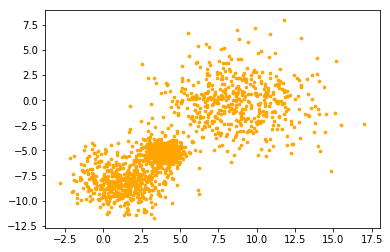

In [54]:
# TODO: Implement the function to plot the data.
import matplotlib.pyplot as plt
%matplotlib inline
# plt.plot(X_1[:,0], X_1[:,-1])
plt.scatter(X_1[:,0], X_1[:,-1], color = 'orange', s = 7)
# plt.show()

In [55]:
# plt.clf()

In [56]:
print(type(X_1[:,0]))
print(X_1[:,0].shape)

<class 'numpy.ndarray'>
(1500,)


## 2. Implement k-means and k-medoids algorithm  (20p)

In this problem, the final goal is to complete "kmeans" and "kmedoids' function. 
To this end, please follow the step by step instructions in this problem.
After implementation you should apply your function to data_1(X_1) and plot the clusters for three different k values (k=2,3,4).
You should assign a different color for each class.

For this problem, you cannot use any external libraires except Numpy!

### #1. Distance and Cost function

To assign each data point to a specific class, we need to measure the distance between data points. You should write up the following 'distance' function.
Here, we will use "squared Euclidean distance" as a metric measure.
Also implement the cost function to calcuate the cost(error) reference to slide 13 of lecture 15

> Reference: 
<br> numpy.linalg.norm() method
<br>https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html
<br><br> from sklearn.cluster import KMeans
<br>https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
<br><br> K mean cluster algoritm 
<br> idea: https://ratsgo.github.io/machine%20learning/2017/04/19/KC/
<br> code1: https://mubaris.com/posts/kmeans-clustering/
<br> code2: https://www.kaggle.com/andyxie/k-means-clustering-implementation-in-python

In [57]:
from sklearn.cluster import KMeans

In [58]:
def distance(x1, x2):
################################################################################
# TODO: Implement the function to measure "squared Euclidean distance"         #
#   - Squared Euclidean distance is defined by d(x1, x2) = (x1-x2)(x1-x2)'     #
#   - x1 and x2 can be matrices (calculating many points at once)              #
#     as well as vectors (calculating the distance one-by-one point)           #
################################################################################
    
    # Write your code here
    dist = None
    if x1.shape == x2.shape:
        dist = np.linalg.norm(x1 - x2, axis = 0)**2
    else:
        dist = np.linalg.norm(x1 - x2, axis = 1)**2
    return dist

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

> N is # of instances, p is # of dimension for each data instance, K is # of clusters 
<br> data $ \in R^{N \times p}$ 
<br> centriods $ \in R^{K \times p}$ 
<br> clusters means data_cluster_indice 
<br> the number of clusters $ = {K}$

In [59]:
def cost(data, centroids, clusters):
    
################################################################################
# TODO: Implement cost(error) function reference to slide 13 of lecture 15
#       For k-medoids, just substitue center points in the formula with medoids. 

#       You can use this cost function for both k-means and k-medoids.
#       You'd better call distance function for implementing this function
################################################################################ 
    
    # Write you code here
    
#     # Expectation step 
#     # Assigning each value to its closest cluster
#     # clusters means data_cluster_indice
#     data_cluster_indice = np.zeros(len(data), int)
#     for i in range(len(data)):
#         distances = distance(data[i], centroids)
#         cluster_index = np.argmin(distances)
#         data_cluster_indice[i] = cluster_index

#     print("debug of cost function")
    cost = 0
    for i in range(len(data)):
        cost += distance(data[i], centroids[clusters[i]])
        
    return cost

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

> Expectation Step
<br> Assigning each value to its closest cluster, that is, find cluster index for each data

distances's dimension $ K \times p $

In [60]:
def expectation(data, centroids, K):
    # Assigning each value to its closest cluster
    data_cluster_indice = np.zeros(len(data), int)
    for i in range(len(data)):
        distances = distance(data[i], centroids)
        cluster_index = np.argmin(distances)
        data_cluster_indice[i] = cluster_index
    return data_cluster_indice

In [61]:
# distance(data[0], centroids)

> Maximization Step
<br> Finding the new centroids by taking the average value

In [62]:
def maximization(data, data_cluster_indice, K):
    # Finding the new centroids by taking the average value
    centroids_new = np.zeros((K, np.size(data, axis = 1)))
    for i in range(K):
        points = [data[j] for j in range(len(data)) if data_cluster_indice[j] == i]
        centroids_new[i] = np.mean(points, axis=0)
    return centroids_new

> Test using library 

In [63]:
# Create a kmeans model on our data, using k clusters.  
# random_state helps ensure that the algorithm returns the same results each time.
K = 2
kmeans_model = KMeans(n_clusters=K, random_state=0).fit(X_1)
# These are our fitted labels for clusters 
# -- the first cluster has label 0, and the second has label 1.
labels = kmeans_model.labels_
# Sum of distances of samples to their closest cluster center
interia = kmeans_model.inertia_
centers = kmeans_model.cluster_centers_

In [64]:
print(interia)
print(centers)

12182.914413326089
[[ 2.63434186 -6.55097678]
 [ 8.8284977  -0.08219273]]


> which is same as my cost function

In [65]:
K = 2
clusters = expectation(X_1, centers, K)
cost(X_1, centers, clusters)

12182.914413326089

In [66]:
cluster_indices = expectation(X_1, centers, K)
cluster_indices

array([1, 0, 0, ..., 0, 0, 0])

In [67]:
maximization(X_1, cluster_indices, K)

array([[ 2.63434186, -6.55097678],
       [ 8.8284977 , -0.08219273]])

> using sklearn.cluster library, we can easily compute cost => Kmeans(...).fit(X).inertia

In [68]:
X_test = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
km = KMeans(n_clusters=2, random_state=0).fit(X_test)
labels = km.labels_
interia = km.inertia_
centers = km.cluster_centers_

In [69]:
print(labels)
print(interia)
print(centers)

[1 1 1 0 0 0]
16.0
[[10.  2.]
 [ 1.  2.]]


In [70]:
centers

array([[10.,  2.],
       [ 1.,  2.]])

In [71]:
K = 2
X_test = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
clusters = expectation(X_test, centers, K)
print(clusters)
cost(X_test, centers, clusters)

[1 1 1 0 0 0]


16.0

In [72]:
distance(X_test[0], centers)

array([81.,  0.])

In [73]:
K = 2
data_cluster_indice = np.zeros(len(X_test), int)
# Assigning each value to its closest cluster
for i in range(len(X_test)):
    distances = distance(X_test[i], centers)
#     print(i,"th data", end = "")
#     print(" dist = ", distances)
    cluster_index = np.argmin(distances)
    data_cluster_indice[i] = cluster_index  
print(data_cluster_indice)

cost = 0
for i in range(len(X_test)):
#     print(i,"th data ", end = "")
#     print(X_test[i])
#     print(centers[data_cluster_indice[i]])
#     print("dist = ", distance(X_test[i], centers[data_cluster_indice[i]]))
    cost += distance(X_test[i], centers[data_cluster_indice[i]])

print(cost)

[1 1 1 0 0 0]
16.0


In [74]:
centers[0]
X_test[0]
centers[data_cluster_indice[0]]


array([1., 2.])

In [75]:
distance(np.array([1,2]),np.array([3,4]))

8.000000000000002

### #2. Stopping criteria 

k-means and k-medoids clustering algorithm repeats "assign" and "update" steps until a stopping criterion is met. Design and implement your own stopping conditions.

**Question #1 :** What is your stopping criteria? You should design at least two conditions.

**Your Answer:** Fill this in

In [76]:
def stopping_criteria(error, iteration):
################################################################################
# TODO: Implement the function for stopping criteria                           #
#   - You can take any inputs as an argument                                   #
#   - Make sure that the output of the function is the type of 'boolean'       #
################################################################################ 

    # Write your code here
    is_stop = None
    if (error < 1e-8 or iteration > 10):
#     if (error < 1e-8):
        is_stop = False
    else:
        is_stop = True
    
    return is_stop

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

In [77]:
stopping_criteria(30,2)

True

### #3. k-means  algorithm

You should write up the following function.

In [78]:
clusters = np.zeros(len(X_1))
type(clusters)
clusters.shape

(1500,)

In [79]:
len(X_1)
np.zeros(len(X_1)).shape

(1500,)

> reference: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.sample.html

In [80]:
import random

[[ 3.87721925 -4.99794813]
 [ 7.19601112 -2.06229287]
 [ 3.9245864  -8.24364089]]


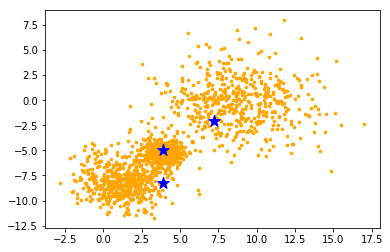

In [81]:
k_random_row = random.sample(range(0,len(X_1)), 3)
centers = X_1[k_random_row, :]
print(centers)
# Plot the data and the centers generated as random
plt.clf()
plt.scatter(X_1[:,0], X_1[:,1], c= 'orange', s = 7)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='b', s=150)

In [82]:
X = np.array(list(zip(X_1[:,0], X_1[:,1])))
X.shape

(1500, 2)

> N is # of instances, p is # of dimension for each data instance, K is # of clusters 
<br> data $ \in R^{N \times p}$ 
<br> centriods $ \in R^{K \times p}$ 
<br> # of clusters $ = {K}$ 
<br> clusters means data_cluster_indice $ \in [0, K-1] \subset Z^{N \times 1}$ 

In [83]:
def kmeans_user(data, k):
################################################################################
# TODO: Implement k-means algorithm                                             #
################################################################################   
    
    # Write your code here
    
    # Setup 
    clusters = np.zeros(len(data), int) # you can change the type of this variable
    centroids_old = centroids_new = np.zeros((K, np.size(data, axis = 1)))
    error = 1e+10
    
    # 0. Choose k initial cluster centers 
    centroids = None
    # randomly choose k centers 
    k_random_row_indice = random.sample(range(0,len(data)), k)
    centroids_old = data[k_random_row_indice, :]
#     print(centroids_old)
    
    iteration = 0
    is_continue = stopping_criteria(error, iteration)
    
    # initial point plot
    plt.clf()
    plt.subplot(1,2,1)
    plt.scatter(data[:,0], data[:,1], c= 'r', s = 7)
    plt.scatter(centroids_old[:,0], centroids_old[:,1], marker='*', c='#050505', s=150)
    plt.title("inital point")
    
    while is_continue:
        # Algorithm procedure:
        #   1. Compute point-to-cluster-centroid distances of all data points to each centroid 
        
        #   2. Assign each point to the cluster with the closest centroid.
        clusters = expectation(data, centroids_old, k)
#         error = cost(data, centroids_old, clusters)
#         print("debug")
#         print("centers = ",centroids_old)
#         print("clusters = ",clusters)
        
        #   3. Update the centroid values: the average of the points in each cluster
        centroids_new = maximization(data, clusters, k)
        centroids_old = (centroids_new)
        
#         print("debug")
#         print(clusters)
        
        error = cost(data, centroids_new, clusters)
#         print(error)
        
        # Loop should run until a stopping criterion is satisfied
        iteration += 1
        is_continue = stopping_criteria(error, iteration)
#         print(is_continue, iteration)
    
    
    colors = ['r', 'b', 'g', 'y', 'c', 'm']
    # final point plot
    plt.subplot(1,2,2)
    for i in range(k):
        points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
        plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    plt.scatter(centroids_new[:,0], centroids_new[:,1], marker='*', c='#050505', s=150)
    plt.title("after clustering")
    
    print("final error = ",error)
    
    return centroids_new, clusters 

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

In [84]:
# X_test
print(centers)
print(clusters)
# X_test[]
distances = distance(X_test[3], centers)
print(distances)
print(np.argmin(distances))
print(np.argmin(np.array([15,15,15])))

[[ 3.87721925 -4.99794813]
 [ 7.19601112 -2.06229287]
 [ 3.9245864  -8.24364089]]
[0. 0. 0. ... 0. 0. 0.]
[ 86.45972208  24.36457699 141.842829  ]
1
0


In [85]:
type(X_test[0][1])


numpy.int32

In [86]:
def cost(data, centroids, clusters):
    
################################################################################
# TODO: Implement cost(error) function reference to slide 13 of lecture 15
#       For k-medoids, just substitue center points in the formula with medoids. 

#       You can use this cost function for both k-means and k-medoids.
#       You'd better call distance function for implementing this function
################################################################################ 
    
    # Write you code here
    
#     # Expectation step 
#     # Assigning each value to its closest cluster
#     # clusters means data_cluster_indice
#     data_cluster_indice = np.zeros(len(data), int)
#     for i in range(len(data)):
#         distances = distance(data[i], centroids)
#         cluster_index = np.argmin(distances)
#         data_cluster_indice[i] = cluster_index

#     print("debug of cost function")
    cost = 0
    for i in range(len(data)):
        cost += distance(data[i], centroids[clusters[i]])
        
    return cost

################################################################################
#                                 END OF YOUR CODE                             #

final error =  125.5


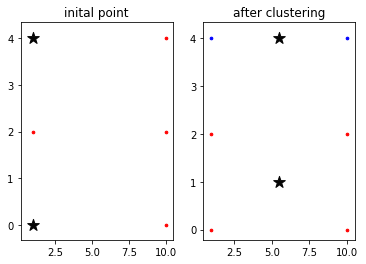

In [87]:
[centers, clusters] = kmeans_user(X_test, 2)

In [88]:
centers

array([[5.5, 1. ],
       [5.5, 4. ]])

In [89]:
clusters

array([0, 1, 0, 0, 1, 0])

final error =  16.0


(array([[ 1.,  2.],
        [10.,  2.]]), array([0, 0, 0, 1, 1, 1]))

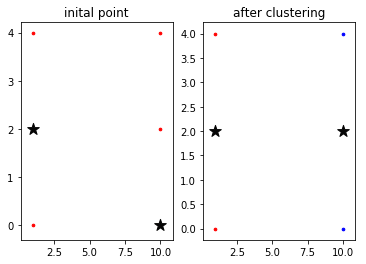

In [90]:
kmeans_user(X_test, 2)

final error =  12182.91441332608


(array([[ 8.8284977 , -0.08219273],
        [ 2.63434186, -6.55097678]]), array([0, 1, 1, ..., 1, 1, 1]))

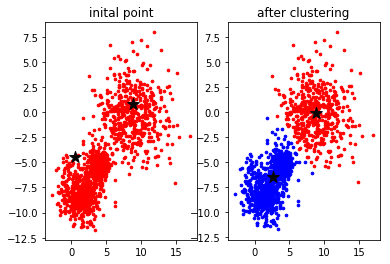

In [91]:
kmeans_user(X_1, 2)

In [ ]:
kmeans_user(X_1, 3)

In [ ]:
kmeans_user(X_1, 4)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Create a kmeans model on our data, using k clusters.  
# random_state helps ensure that the algorithm returns the same results each time.
K = 2
kmeans_model = KMeans(n_clusters= K, random_state=0).fit(X_1)
# These are our fitted labels for clusters 
# -- the first cluster has label 0, and the second has label 1.
labels = kmeans_model.labels_
# Sum of distances of samples to their closest cluster center
interia = kmeans_model.inertia_
centers = kmeans_model.cluster_centers_

In [ ]:
# print(labels)
print(interia)
print(centers)

In [ ]:
K = 3
kmeans_model = KMeans(n_clusters= K, random_state=0).fit(X_1)
# Sum of distances of samples to their closest cluster center
interia = kmeans_model.inertia_
centers = kmeans_model.cluster_centers_
print(interia)
print(centers)

In [ ]:
K = 4
kmeans_model = KMeans(n_clusters= K, random_state=0).fit(X_1)
# Sum of distances of samples to their closest cluster center
interia = kmeans_model.inertia_
centers = kmeans_model.cluster_centers_
print(interia)
print(centers)

### #4. k-medoids algorithm

You should write up the following function.

In [92]:
def maximization_medoids(data, data_cluster_indice, K):
    # Finding the new centroids by taking the average value
    centroids_new = np.zeros((K, np.size(data, axis = 1)))
    
    # for each cluster 
    for k in range(K):
        points = [data[i] for i in range(len(data)) if data_cluster_indice[i] == k]
#         print(points)
#         centroids_new[k] = np.mean(points, axis=0)
        distances = np.zeros(len(points))
        for i in range(len(points)):
            for j in range(len(points)):
                distances[i] += distance(points[i], points[j])
#         print(distances)
        clusteroid_index = np.argmin(distances)
        centroids_new[k] = points[clusteroid_index]
    
    return centroids_new

test

In [93]:
K = 2
X_test = np.array([[1, 0], [1, 2], [1, 4], [10, 0], [10, 2], [10, 4]])
k_random_row_indice = random.sample(range(0,len(X_test)), K)
centers = X_test[k_random_row_indice, :]
cluster_indices = expectation(X_test, centers, K)
centers
cluster_indices

array([1, 1, 1, 0, 0, 0])

In [94]:
# distance(np.array([1,2]), np.array([1,4]))

In [95]:
 maximization_medoids(X_test, cluster_indices, K)

array([[10.,  2.],
       [ 1.,  2.]])

In [96]:
def kmedoids(data, k):
################################################################################
# TODO: Implement k-medoids algorithm                                          #
################################################################################   
    
    # Write your code here
    
    # Setup 
    clusters = np.zeros(len(data), int) # you can change the type of this variable
    centroids_old = centroids_new = np.zeros((k, np.size(data, axis = 1)))
    error = 1e+10
    
    # 0. Choose k initial cluster centers 
    k_random_row_indice = random.sample(range(0,len(data)), k)
    centroids_old = data[k_random_row_indice, :]

    # initial point plot
    plt.clf()
    plt.subplot(1,2,1)
    plt.scatter(data[:,0], data[:,1], c= 'r', s = 7)
    plt.scatter(centroids_old[:,0], centroids_old[:,1], marker='*', c='#050505', s=150)
    plt.title("inital point")
#     print("debug0")
    iteration = 0
    is_continue = stopping_criteria(error, iteration)
    while is_continue:
        # Algorithm procedure:
        #   1. Compute point-to-cluster-centroid distances of all data points to each centroid
        clusters = expectation(data, centroids_old, k)
#         print("debug1")
        
        #   2. Assign each point to the cluster with the closest centroid.
        centroids_new = maximization(data, clusters, k)
#         print("debug2")
        #   3. Update the centroid values: For a given cluster, a data point that minimizes 
        #      the sum of distances to ohter points in that cluster
        centroids_new = maximization_medoids(data, clusters, k)
        centroids_old = centroids_new
        error = cost(data, centroids_new, clusters)

        # Loop should run until a stopping criterion is satisfied
        iteration += 1
        is_continue = stopping_criteria(error, iteration)
        
    colors = ['r', 'b', 'g', 'y', 'c', 'm']
    # final point plot
    plt.subplot(1,2,2)
    for i in range(k):
        points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
        plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    plt.scatter(centroids_new[:,0], centroids_new[:,1], marker='*', c='#050505', s=150)
    plt.title("after clustering")
    
    print("final error = ",error)
    
    
    return centroids_new, clusters 

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

debug0
debug1
debug2
debug1
debug2
debug1
debug2
debug1
debug2
debug1
debug2
debug1
debug2
debug1
debug2
debug1
debug2
debug1
debug2
debug1
debug2
debug1
debug2
final error =  12243.244627293281


(array([[ 8.9541391 , -0.09431043],
        [ 2.44175219, -6.43104112]]), array([0, 1, 1, ..., 1, 1, 1]))

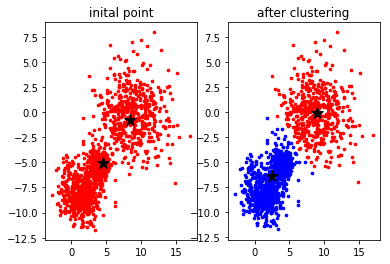

In [97]:
kmedoids(X_1, 2)

### #5. Apply clustering and plot the result

Apply clustering using 'kmeans' and 'kmedoids' function for data_1(X_1) with k=3 and plot the result.

In [ ]:
# TODO : Plot the result for different k values(K=2,3,4) for each algorithm using data_1(X_1).

## 3. Comparing K-means with K-medoids (12p) 

Now apply k-means and k-medoids algorithm to data_2(X_2, y_2). y_2 is the ground-truth cluster label.
Experiment five times, changing the initial points for each trial. 

Report confusion matrix, error(cost function in previous problem), running time of each algorithm by averaging each result.(For confusion matrix, just average each value) 

You can easily measure running time by 'time' function already loaded.

Also, you can use any kinds of external libraries 
except for applying k-means and k-medoids(You should use the function in previous problem).

In [ ]:
# TODO : Report confusion matrix, error, running time of each algorithm by averaging each result.

**Question #1 :** Explain why these two results are different through the characteristics of the two algorithms(K-means, K-medoids)

**Your Answer:** Fill this in